# Base Model Training: Logistic Regression

## 1. Import Dependencies

In [102]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

warnings.filterwarnings('ignore')

## 2. Introduction to Logistic Regression

### Sigmoid Function

The **sigmoid function** is used to map any real-valued number into the range (0, 1). It’s commonly used in logistic regression and neural networks.

**Formula:**
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

**Derivative:**
$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

**Properties:**
- Output range: \( (0, 1) \)
- Smooth and differentiable
- S-shaped curve
- Centered at \( x = 0 \): \( \sigma(0) = 0.5 \)

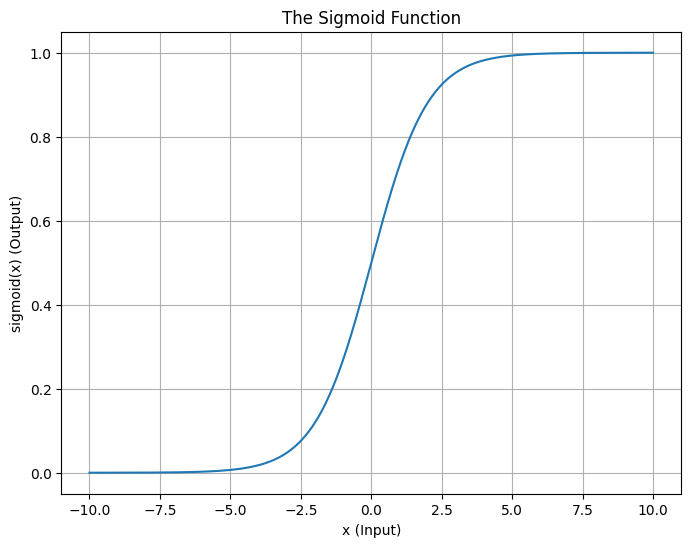

In [103]:
def sigmoid_values(x):
    return 1 / (1 + np.exp(-x))

X_linespace = np.linspace(-10, 10, 1000)
Y_hat = sigmoid_values(X_linespace)

plt.figure(figsize=(8, 6))
plt.plot(X_linespace, Y_hat)
plt.xlabel('x (Input)')
plt.ylabel('sigmoid(x) (Output)')
plt.title('The Sigmoid Function')
plt.grid(True)
plt.show()

## 3. Load Processed Data

In [104]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

print("Data loaded successfully from artifacts.")
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

Data loaded successfully from artifacts.
X_train shape: (12668, 13)
Y_train shape: (12668,)
X_test shape: (1999, 13)
Y_test shape: (1999,)


## 4. Train Logistic Regression Model

In [105]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

model_lr.fit(X_train, Y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## 5. Make Predictions

In [106]:
# Predictions on training and test sets
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

# Probabilities for training and test sets
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

print("Predictions generated for both training and test sets.")

Predictions generated for both training and test sets.


## 6. Evaluate Model Performance

### Metric Definitions:
- **Accuracy**: Overall correctness of the model.
- **Precision**: True Positives / (True Positives + False Positives). Measures the accuracy of positive predictions.
- **Recall**: True Positives / (True Positives + False Negatives). Measures the ability of the model to find all the positive samples.
- **F1-Score**: The harmonic mean of Precision and Recall. Provides a single score that balances both metrics.

In [107]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

print("--- Model Performance Metrics ---")
print(f"| Metric    | Score   |")
print(f"|-----------|---------|")
print(f"| Accuracy  | {accuracy:.4f}  |")
print(f"| Precision | {precision:.4f}  |")
print(f"| Recall    | {recall:.4f}  |")
print(f"| F1-Score  | {f1:.4f}  |")
print("---------------------------------")

--- Model Performance Metrics ---
| Metric    | Score   |
|-----------|---------|
| Accuracy  | 0.6948  |
| Precision | 0.3423  |
| Recall    | 0.6755  |
| F1-Score  | 0.4544  |
---------------------------------


### 6.1. Confusion Matrix

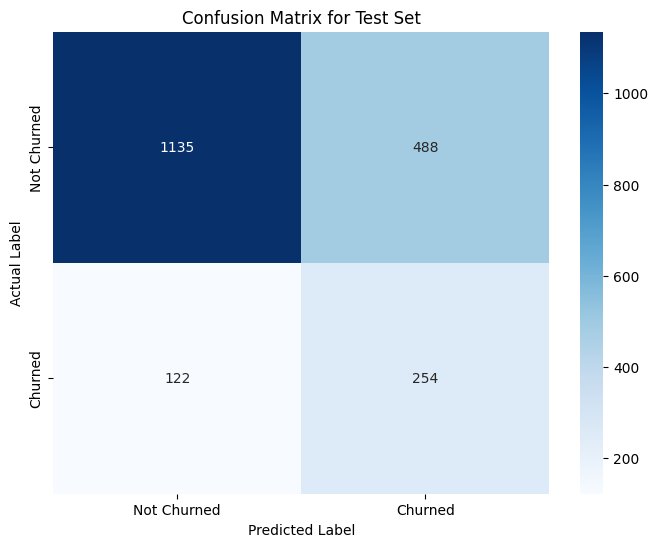

In [108]:
cm = confusion_matrix(Y_test, Y_hat_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Test Set')
plt.show()